<a href="https://colab.research.google.com/github/jpborges2003/R_PROJECT/blob/main/trabalhor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I start the analysis by importing the chosen base file (AB_NYC_2019.csv).

In [8]:
# Import the dataset
nyc_airbnb <- read.csv("AB_NYC_2019.csv")


I use the **head**() function to display the first n lines present in the input data frame.

In [25]:
# Display the first rows of the dataset
head(nyc_airbnb)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>
1,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,,NA,1,365
4,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
6,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In order to show the structure of the topic, I use the str() function.

In [26]:
# Check the structure of the dataset
str(nyc_airbnb)

'data.frame':	48895 obs. of  16 variables:
 $ id                            : int  2539 2595 3647 3831 5022 5099 5121 5178 5203 5238 ...
 $ name                          : chr  "Clean & quiet apt home by the park" "Skylit Midtown Castle" "THE VILLAGE OF HARLEM....NEW YORK !" "Cozy Entire Floor of Brownstone" ...
 $ host_id                       : int  2787 2845 4632 4869 7192 7322 7356 8967 7490 7549 ...
 $ host_name                     : chr  "John" "Jennifer" "Elisabeth" "LisaRoxanne" ...
 $ neighbourhood_group           : chr  "Brooklyn" "Manhattan" "Manhattan" "Brooklyn" ...
 $ neighbourhood                 : chr  "Kensington" "Midtown" "Harlem" "Clinton Hill" ...
 $ latitude                      : num  40.6 40.8 40.8 40.7 40.8 ...
 $ longitude                     : num  -74 -74 -73.9 -74 -73.9 ...
 $ room_type                     : chr  "Private room" "Entire home/apt" "Private room" "Entire home/apt" ...
 $ price                         : int  149 225 150 89 80 200 60 79 79 150 .

Seeking the summary of numeric variables, we use the function**summary()** fuction.

In [27]:
# Statistical summary of numeric variables
summary(nyc_airbnb)

       id               name              host_id           host_name        
 Min.   :    2539   Length:48895       Min.   :     2438   Length:48895      
 1st Qu.: 9471945   Class :character   1st Qu.:  7822033   Class :character  
 Median :19677284   Mode  :character   Median : 30793816   Mode  :character  
 Mean   :19017143                      Mean   : 67620011                     
 3rd Qu.:29152178                      3rd Qu.:107434423                     
 Max.   :36487245                      Max.   :274321313                     
                                                                             
 neighbourhood_group neighbourhood         latitude       longitude     
 Length:48895        Length:48895       Min.   :40.50   Min.   :-74.24  
 Class :character    Class :character   1st Qu.:40.69   1st Qu.:-73.98  
 Mode  :character    Mode  :character   Median :40.72   Median :-73.96  
                                        Mean   :40.73   Mean   :-73.95  
           

Seeking the summary of categorical variables, we use the **table()** function.

In [28]:
# Summary of categorical variables
table(nyc_airbnb$neighborhood_group)
table(nyc_airbnb$room_type)

< table of extent 0 >


Entire home/apt    Private room     Shared room 
          25409           22326            1160 

We created a bar chart to compare accommodation types.

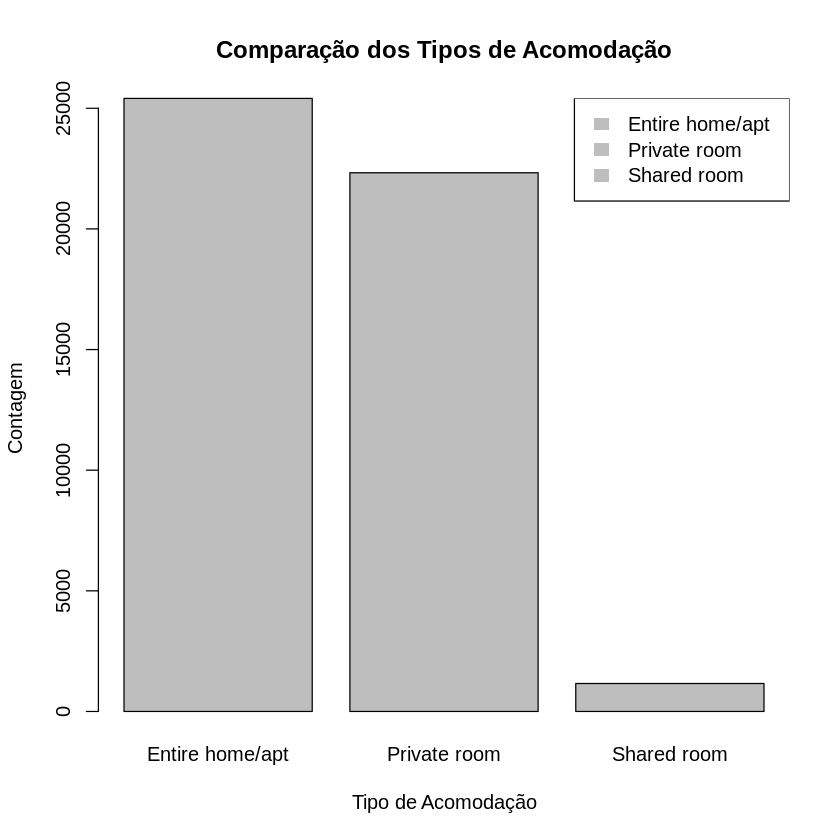

In [29]:
# Count of accommodation types
accommodation_count <- table(nyc_airbnb$room_type)

# Creating the comparison chart
barplot(accommodation_count, 
        main = "Comparação dos Tipos de Acomodação",
        xlab = "Tipo de Acomodação",
        ylab = "Contagem",
        col = "grey",
        legend = FALSE)

# Adding caption
legend("topright", 
       legend = names(accommodation_count), 
       fill = "grey",
       border = NA)


To facilitate visualization, we changed the bar graph to a pie chart.

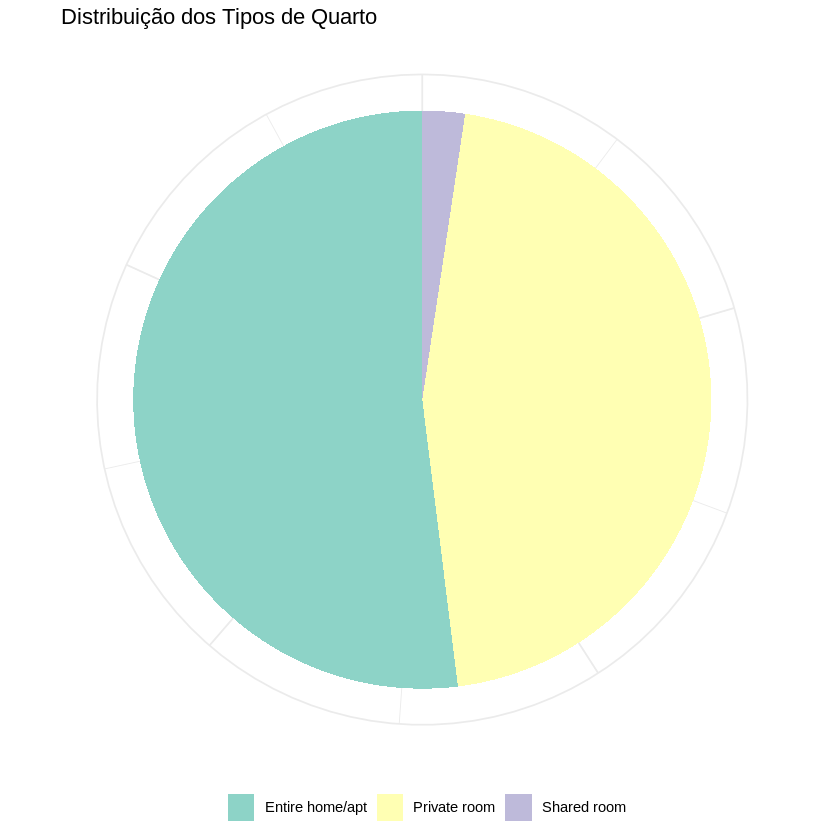

In [30]:
library(ggplot2)

# Create a table with the count of each type of room
count_room_type <- table(nyc_airbnb$room_type)

# Create a data frame with the table data
df_room_type <- data.frame(room_type = names(count_room_type),
                           count = as.numeric(count_room_type))

# Create the pie chart
pie_chart <- ggplot(df_room_type, aes(x = "", y = count, fill = room_type)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar("y", start = 0) +
  labs(title = "Distribuição dos Tipos de Quarto") +
  scale_fill_brewer(palette = "Set3") +
  theme_minimal() +
  theme(axis.title = element_blank(),
        axis.text = element_blank(),
        legend.title = element_blank(),
        legend.position = "bottom")

# Display the chart
print(pie_chart)


We made a histogram to bring an analysis of prices and frequency of accommodation.

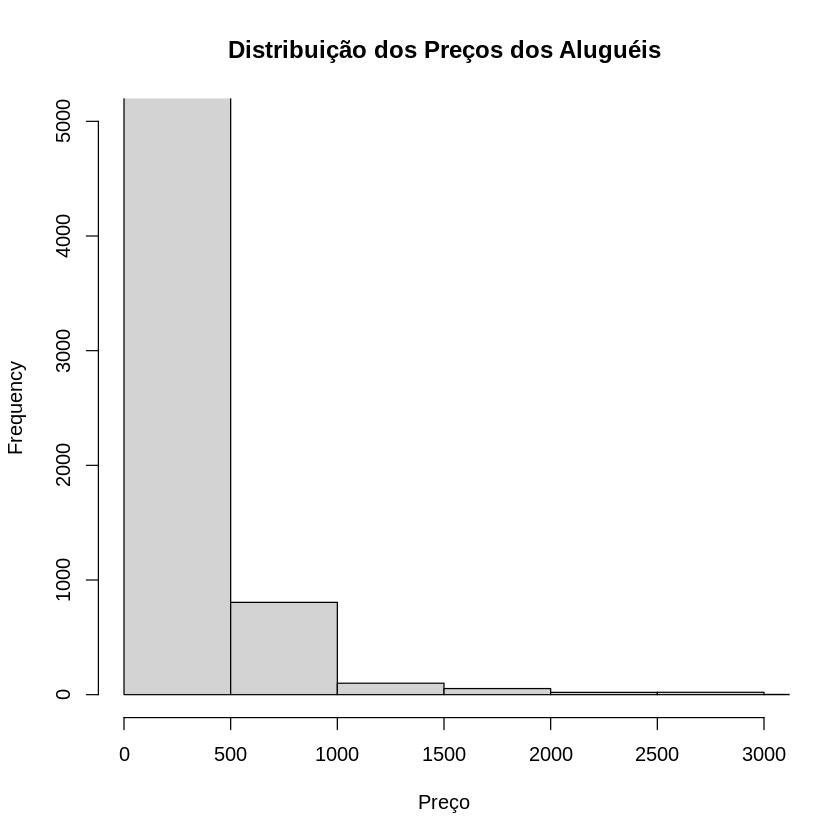

In [31]:
#Histogram of rental prices with zoom
hist(nyc_airbnb$price, main = "Distribuição dos Preços dos Aluguéis", xlab = "Preço", xlim = c(0, 3000), ylim = c(0, 5000))


Looking for a relationship between price and reviews, we made a scatter plot.

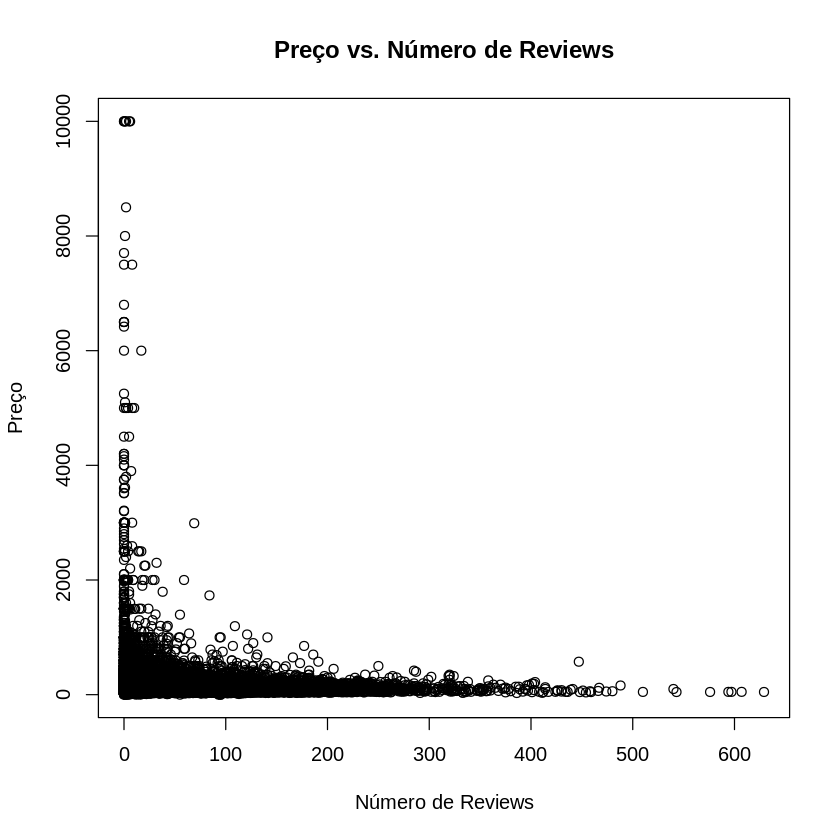

In [32]:
# Scatter plot of price against number of reviews
plot(nyc_airbnb$number_of_reviews, nyc_airbnb$price, main = "Preço vs. Número de Reviews", 
     xlab = "Número de Reviews", ylab = "Preço")


In order to have a better visualization, we filtered the graph.

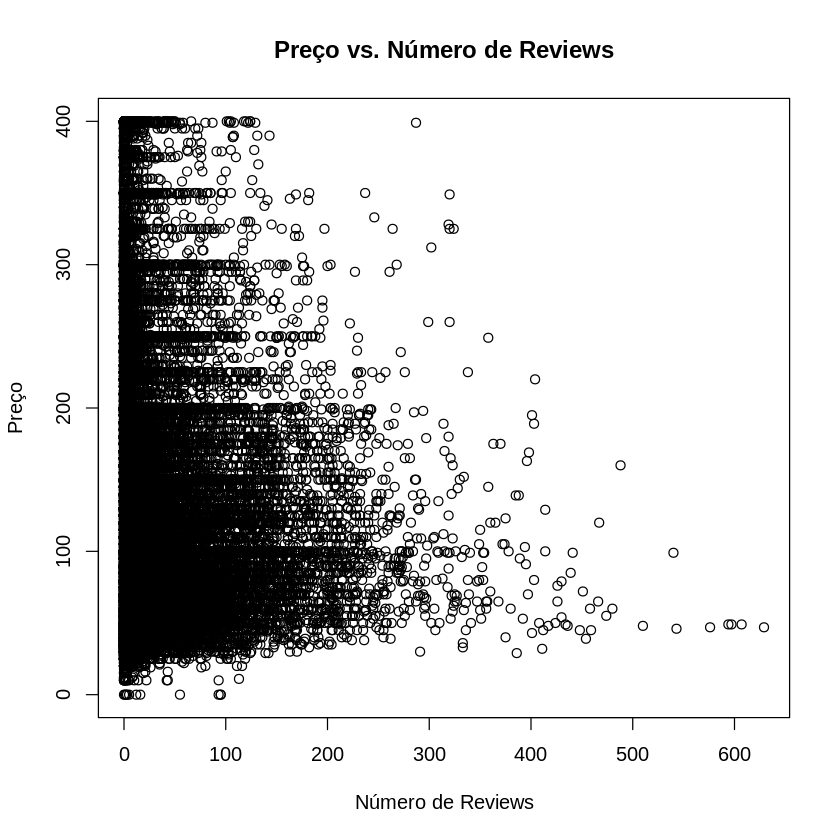

In [33]:
# Filter the data for price up to 400 dollars
filtered_data <- subset(nyc_airbnb, price <= 400)

# Scatter plot of price against number of reviews
plot(filtered_data$number_of_reviews, filtered_data$price, 
     main = "Preço vs. Número de Reviews", 
     xlab = "Número de Reviews", ylab = "Preço")


We found it interesting to run a scatter plot, based on location and price of accommodation.

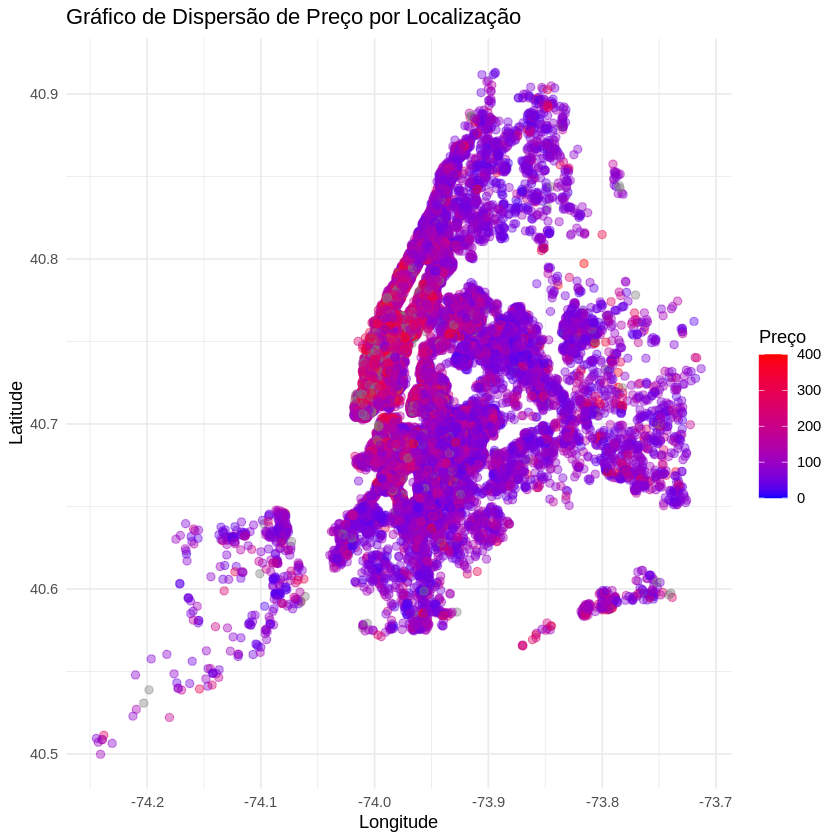

In [34]:
library(ggplot2)

# Creation of the scatter plot with colors representing the price from 0 to 900 dollars
ggplot(nyc_airbnb, aes(x = longitude, y = latitude, color = price)) +
  geom_point(alpha = 0.4, size = 2) +
  scale_color_gradient(low = "blue", high = "red", limits = c(0, 400)) +
  labs(title = "Gráfico de Dispersão de Preço por Localização",
       x = "Longitude",
       y = "Latitude",
       color = "Preço") +
  theme_minimal()



We made a bar chart to highlight the disparity between New York's neighborhoods.

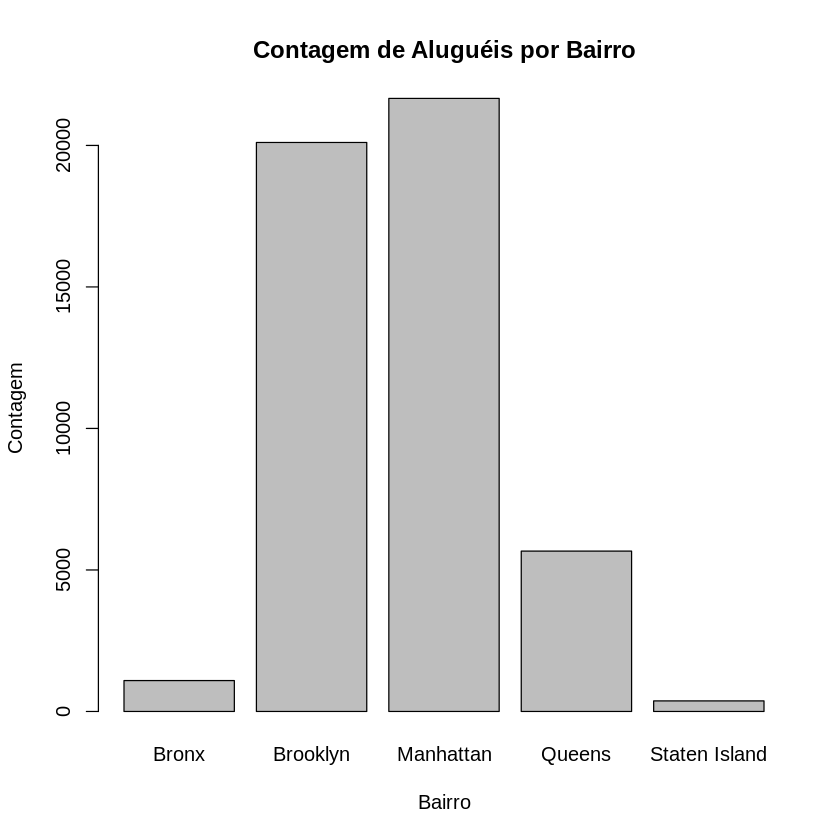

In [35]:
# Bar chart of rent count by neighborhood
barplot(table(nyc_airbnb$neighbourhood_group), main = "Contagem de Aluguéis por Bairro", 
        xlab = "Bairro", ylab = "Contagem")


We performed the same analysis, only this time with the boxplot.

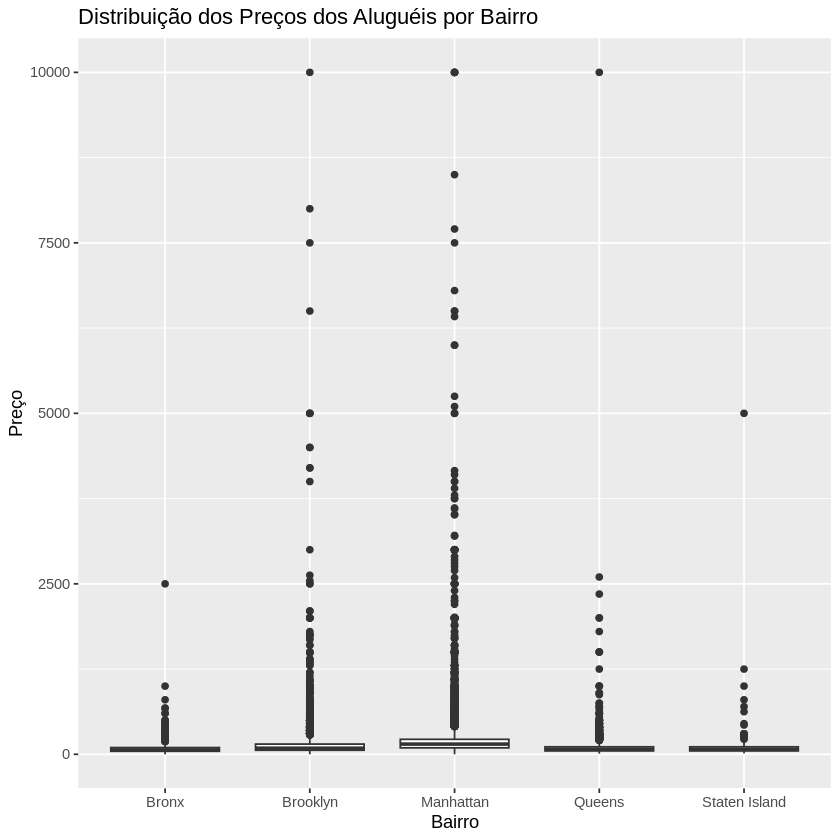

In [21]:
library(ggplot2)

ggplot(nyc_airbnb, aes(x = neighbourhood_group, y = price)) +
  geom_boxplot() +
  labs(x = "Bairro", y = "Preço", title = "Distribuição dos Preços dos Aluguéis por Bairro")


In order to analyze ratings by neighborhood, we made a histogram.

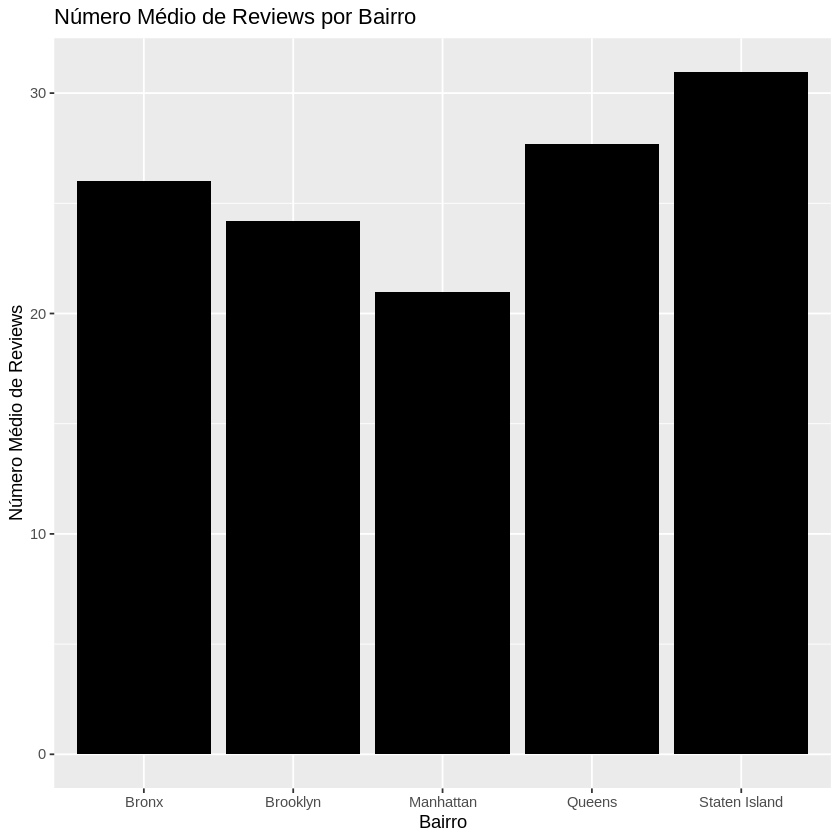

In [22]:
average_reviews <- aggregate(number_of_reviews ~ neighbourhood_group, data = nyc_airbnb, FUN = mean)

ggplot(average_reviews, aes(x = neighbourhood_group, y = number_of_reviews)) +
  geom_bar(stat = "identity", fill = "black") +
  labs(x = "Bairro", y = "Número Médio de Reviews", title = "Número Médio de Reviews por Bairro")


Chart to know the top New York hosts.

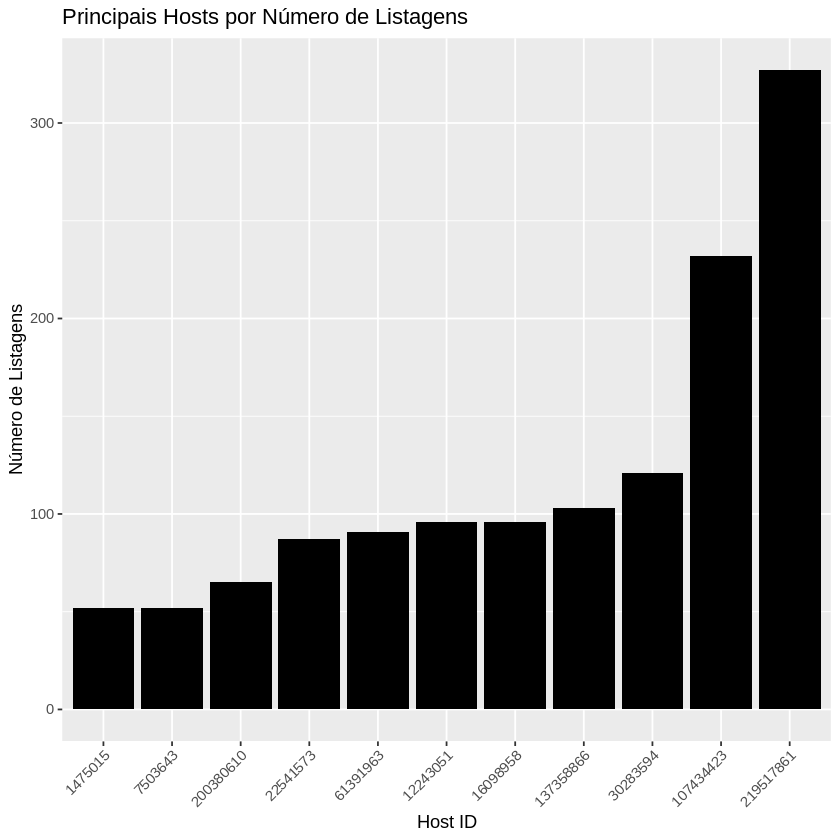

In [36]:
library(ggplot2)
library(dplyr)

# Filter top hosts based on number of listings
top_hosts <- nyc_airbnb %>%
  group_by(host_id) %>%
  summarise(total_listings = n()) %>%
  top_n(10, total_listings)  # Select top 10 hosts

# Sort hosts by number of listings
top_hosts <- top_hosts %>%
  arrange(desc(total_listings))

# Create the bar chart
ggplot(top_hosts, aes(x = reorder(host_id, total_listings), y = total_listings)) +
  geom_bar(stat = "identity", fill = "black") +
  labs(title = "Principais Hosts por Número de Listagens",
       x = "Host ID",
       y = "Número de Listagens") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


Raking to identify the best hosts.

In [37]:
library(dplyr)

# Group by host_id and count the number of listings by host
host_ranking <- nyc_airbnb %>%
  group_by(host_id) %>%
  summarize(total_listings = n())

# Sort ranking in descending order of number of listings
host_ranking <- host_ranking %>%
  arrange(desc(total_listings))

# Show ranking of top hosts
head(host_ranking, 10)


host_id,total_listings
<int>,<int>
219517861,327
107434423,232
30283594,121
137358866,103
12243051,96
16098958,96
61391963,91
22541573,87
200380610,65
